# The "Right Stuff"

Author: **Makenzi Fischbach and Trevor Zou**

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.

In [2]:
%load_ext autoreload
%autoreload 2

import functions as f

## Introduction

What is the "right stuff"? The right stuff is a term coined by author Tom Wolfe to represent the qualities possessed by NASA astronauts that make them deemed fit for the job. For our project, we wanted to look at how this concept of the right stuff has evolved over the past sixty years. We accomplished this through a detailed analysis of various astronaut characteristics. We focused most heavily on education, military involvement, and gender. 

The first group of NASA astronauts, the Mercury Seven, consisted entirely of male, military test pilots. The astronaut program, as well as NASA itself, was introduced in response to the growing tension between the US and the Soviet Union during the Cold War. Pilots were recruited since they are the most equipped to deal with risk and already had an abundance of flight experience. 

Modern astronauts look fairly different due to the shift away from the politically driven actions  of the space race and towards the motive of scientific exploration. In fact, it wasn’t until Apollo 17 when the first civilian astronaut, geologist Jack Schmitt, was sent to space. 


![title](class21.png)

## Method

### Getting the data

We retrieved our data by using the kaggle API’s dataset download feature. We downloaded a zip file containing “The NASA Astronaut Yearbook” 2013 edition, which has information on astronauts ranging from the first astronaut selection class to the twentieth. We then used the zip module to unzip the file, and cleaned up the data by changing the birth date and adding a selection age column. Note some interesting features in the data, such as the NaN’s in the group column, which are indicative that the person was not a part of the standard astronaut application process and was typically a member of the research community or “payload specialist” funded by a payload sponsor.

In [8]:
nasa_astronaut_dataset = f.get_data()

nasa_astronaut_dataset["State"] = nasa_astronaut_dataset["Birth Place"].str[-2:]

nasa_astronaut_dataset.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,State
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,CA
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,MT
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,NY
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,MO
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,NJ


Table 1. A four row excerpt of our pandas dataframe

In [4]:
nasa_astronaut_dataset = f.change_dates(nasa_astronaut_dataset)

nasa_astronaut_dataset[["Name", "Year", "Birth Date", "Selection Age"]]

,Name,Year,Birth Date,Selection Age
0,Joseph M. Acaba,2004.0,1967.0,37.0
1,Loren W. Acton,NaN,1936.0,NaN
2,James C. Adamson,1984.0,1946.0,38.0
3,Thomas D. Akers,1987.0,1951.0,36.0
4,Buzz Aldrin,1963.0,1930.0,33.0
...,...,...,...,...
352,David A. Wolf,1990.0,1956.0,34.0
353,Neil W. Woodward III,1998.0,1962.0,36.0
354,Alfred M. Worden,1966.0,1932.0,34.0
355,John W. Young,1962.0,1930.0,32.0


Table 2: A sample table of the three columns we added using Pandas: "Year", "Birth Date", and "Selection Age". 

## Results
Through the analysis and visualization of our data (using Matplotlib), we were able to find various trends which demonstrate this change of the "right stuff". First, we created a graph that shows the number of astronauts selected per year. The first large spike around 1969 is due to the large increase in support and funding for the space program following the success of the Apollo 11 mission. The second large spike is due to the start of the shuttle program resulting in an increase in the demand for astronauts. 

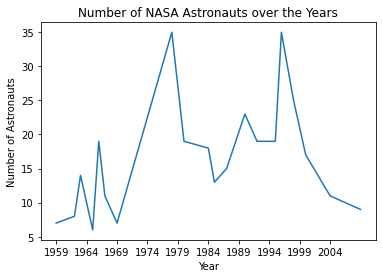

In [15]:
f.plot_astronauts_vs_time(nasa_astronaut_dataset)

Fig 1. A graph of the number of astronauts selected over the years.

In order to obtain a better understanding of the distribution of astronauts in regards to gender and military affiliation, we created a bar chart showing what amount of the total astronauts are male versus female. The graph also shows how many of the total astronauts have some involvement with the military. 

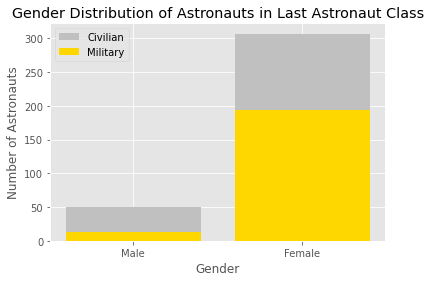

In [19]:
f.gender_military(nasa_astronaut_dataset, ["Male", "Female"],"Gender Distribution of Astronauts in Last Astronaut Class" )

Below is a list of the top university ("Alma Mater") per selection group. 

In [10]:
f.top_college_over_time(nasa_astronaut_dataset)

['US Naval Academy',
 'US Military Academy',
 'US Military Academy',
 'California Institute of Technology',
 'US Naval Postgraduate School',
 'MIT',
 'US Air Force Academy',
 'US Naval Academy',
 'US Naval Academy',
 'US Air Force Academy',
 'US Naval Academy',
 'US Naval Academy',
 'US Air Force Academy',
 'US Naval Academy',
 'US Naval Academy',
 'US Naval Academy',
 'MIT',
 'Embry-Riddle Aeronautical University',
 'University of California-Santa Barbara',
 'Stanford University']

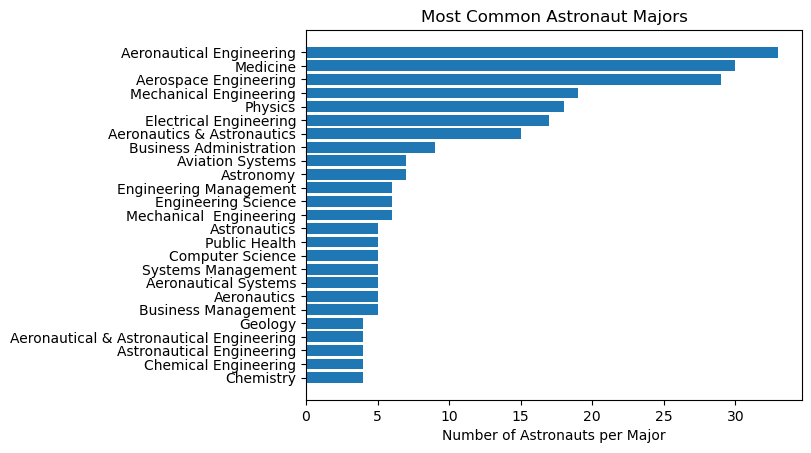

In [7]:
new = f.frequency(nasa_astronaut_dataset, 7)

f.college_bar(nasa_astronaut_dataset,9)

Why is this signifigant? What trends?

We could do the same thing with undergraduate major to see what astronauts majored in (grad and post grad)

In [9]:
new = f.frequency(nasa_astronaut_dataset,8)
print(f.tops(new, 10))

{'Physics': 36, 'Aerospace Engineering': 33, 'Mechanical Engineering': 31, 'Aeronautical Engineering': 29, 'Electrical Engineering': 24, 'Engineering Science': 13, 'Engineering': 12, 'Mathematics': 12, 'Chemistry': 12, 'Chemical Engineering': 9}


In [14]:
f.engineer(nasa_astronaut_dataset)

32.82828282828283 % of Astronauts majored in some kind of Engineering


Why is this signifigant? What trends?

We see that alot of people majored in phsyics! WOW! And that alot of people majored in engineering!

Looking past educational background, we looked to see the Civilian vs Military distribution among astronauts

Trends? Why is this signifigant?

##Trends through Time


Then we started to see how things changed over time.

First we wanted to contextualize it to how many astronauts were really going into space over time.

Why is this signifigant? Any Interesting Trends?

Then we wanted to see how the educational backgroun of astronauts fluctuated throughout the groups

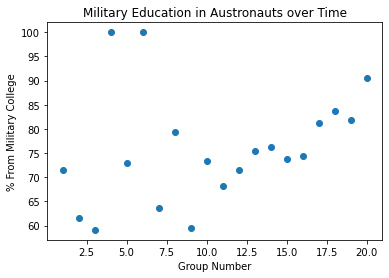

In [9]:

f.military_college_over_time(nasa_astronaut_dataset)

To better understand a shift in pursuit of education, we looked at the proportion of people going to post graduate studies

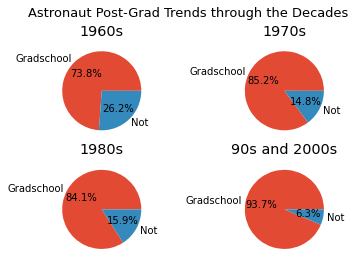

In [130]:
f.grad_school_over_time(nasa_astronaut_dataset)

We also wanted to look at age to see how that has signifigance

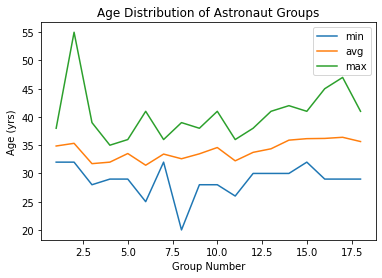

In [18]:
f.age_vs_group(nasa_astronaut_dataset)

Why is this notable?

We also looked at the percentage of women on these groups throughout the same span

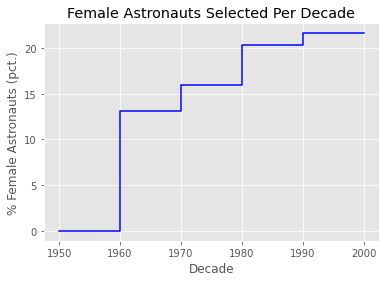

In [122]:
f.female_astronauts_decade(nasa_astronaut_dataset)

To best demonstate the difference, we look at how different the first group of astronauts were to the last group

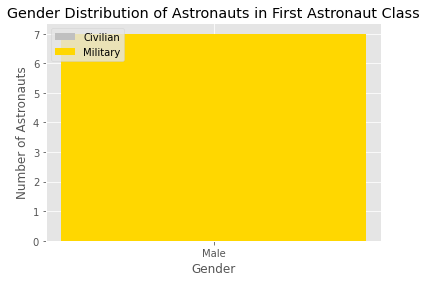

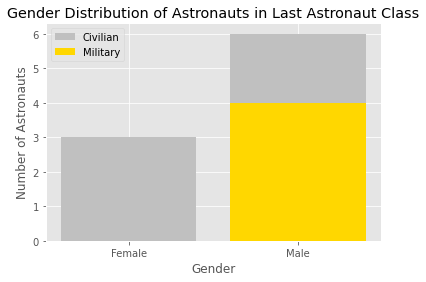

In [22]:
f.first_v_last(nasa_astronaut_dataset)

Why is this singifigant? 

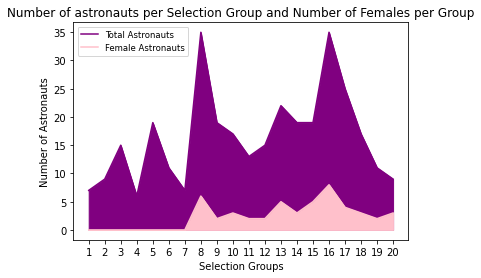

In [5]:
f.female_and_total(nasa_astronaut_dataset)

In [126]:
#Can also delete this, not relevant to argument
deaths = f.frequency(nasa_astronaut_dataset, 18)
print(f.tops(deaths,3))

death_dates = f.frequency(nasa_astronaut_dataset, 17)
print(f.tops(death_dates,4))

{'STS 51-L (Challenger)': 7, 'STS-107 (Columbia)': 6, 'Apollo 1': 3}
{'1/28/1986': 7, '2/1/2003': 6, '1/27/1967': 3, '2/28/1966': 2}


## Conclusion

Our analysis could be improved by figuring out a way to incorporate civilian astronauts not belonging to a selection group, such as payload specialists

Through the analysis of our data, we found several trends which show the ways in which “the right stuff” has changed. We saw a fluctuation in the number of astronauts selected. There is a gradual shift away from military experience toward education as NASA’s motive focused more on exploration and knowledge. We see a trend towards a more equal astronaut selection in regards to gender. There is also evidence of a slight increase in age. The meaning of the right stuff has changed. Hopefully it will continue to evolve and take more strides towards inclusivity and knowledge. 
